In [ ]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
CURRENT_DIR = Path('.').resolve()
MODULES_DIR = CURRENT_DIR.parent.joinpath('src')
sys.path.append(str(MODULES_DIR))
DATA_DIR = CURRENT_DIR.parent.joinpath('Data','Process')

-----

# What are autoenconders?

Autoencoders represent a paradigm shift from the conventional neural networks. The goal of autoencoders is to learn a **Latent Representation** of the input. This representation is usually a compressed representation of the original input

All autoencoders have an **Encoder** and **Decoder**. The role of the encoder is to encode the input to a learned, compressed representation, and the role of the decoder is to reconstruct the original input using the compressed representation.

The folliwing diagram illustrates the architecture of a typical autoencoder

![model](https://i.imgur.com/Jhl7yGP.png)

We do not requiere a laber y. This distinction means that autoencoders are a form of unsupervised learning.

## Latent representation
By forcing the learned representation to be compressed (that is, having smaller dimensions compared to the input), we essentially force the neural network to learn the most salient representation of the input. This ensures, that the learned representation only captures the most relevant characteristics of the input, known as the **latent representation**

## The MNIST handwritten digits dataset

The MNIST dataset contains 70,000 samples of handwritten digits, each of 28x28 pixels.

In [ ]:
from keras.datasets import mnist

In [ ]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

11490434/11490434 [==============================] - 1s 0us/step


Let's plot out each of digits to better visualize our data

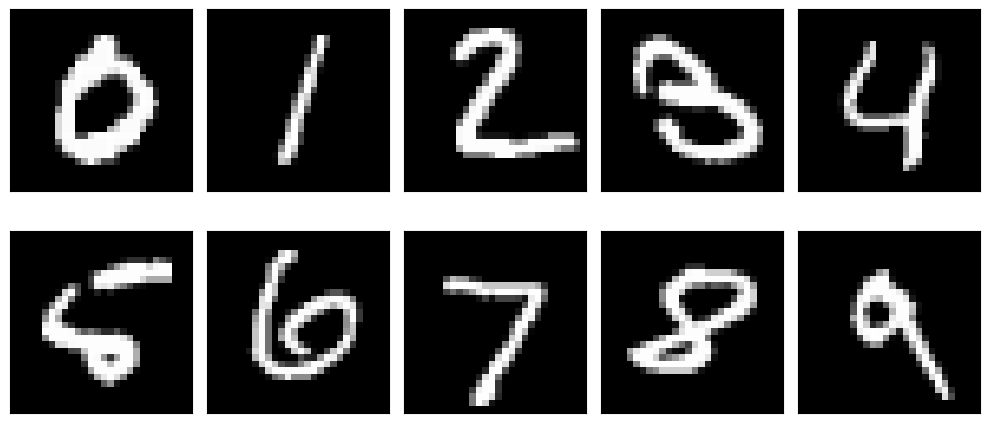

In [ ]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))
for idx, ax in enumerate([ax1,ax2,ax3,ax4,ax5, ax6,ax7,ax8,ax9,ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(X_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

The autoencoder should be able to learn the compressed representation of these digits, and to reproduce the images using this compressed representation

![model](https://i.imgur.com/HmwPzWX.png)

-----

# Bulding a simple autoencoder

![model](https://i.imgur.com/Jhl7yGP.png)

Ideally, the size of the hidden layer should balance between being:

- Sufficiently small enough to represent a compressed representation of the input features
- Sufficiently large enough for the decoder to reconstruct the original input without too much loss

The size of the hidden layer is a hyperparameter that we need to select carafully to obtain the best results.

-----

# Building auotencoders in Keras

We'll start by importing and defining a new `Sequential` class in Keras:

In [ ]:
from keras.models import Sequential
model = Sequential()

We'll add the hidden layer to our model. The number of units is a hyperparameter that we will be experimenting with.

In [ ]:
from keras.layers import Dense

hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size,
                input_shape=(784,),
                activation='relu'))

The output layer is also a fully connected layer, Dense layer, and the size of the output layer should naturally be 784.

In [ ]:
model.add(Dense(
    units=784,
    activation='sigmoid'
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 784)               1568      
                                                                 
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


The next step is to preprocess our data. There are two preprocessing steps required:

1. Reshape the images from 28x28 vector to 784x1 vector
2. Normalize the values of the vector between 0 and 1 from the current 0 to 255

In [ ]:
X_train_reshaped = X_train.reshape(
    (X_train.shape[0],
     X_train.shape[1]*X_train.shape[2])
    )

X_test_reshaped = X_test.reshape(
    (X_test.shape[0],
     X_test.shape[1]*X_test.shape[2])
    )

In [ ]:
X_test_reshaped.shape

(10000, 784)

In [ ]:
X_train_reshaped = X_train_reshaped/255.
X_test_reshaped = X_test_reshaped/255.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train_reshaped, X_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0752
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613


In [ ]:
output = model.predict(X_test_reshaped)

313/313 [==============================] - 0s 1ms/step


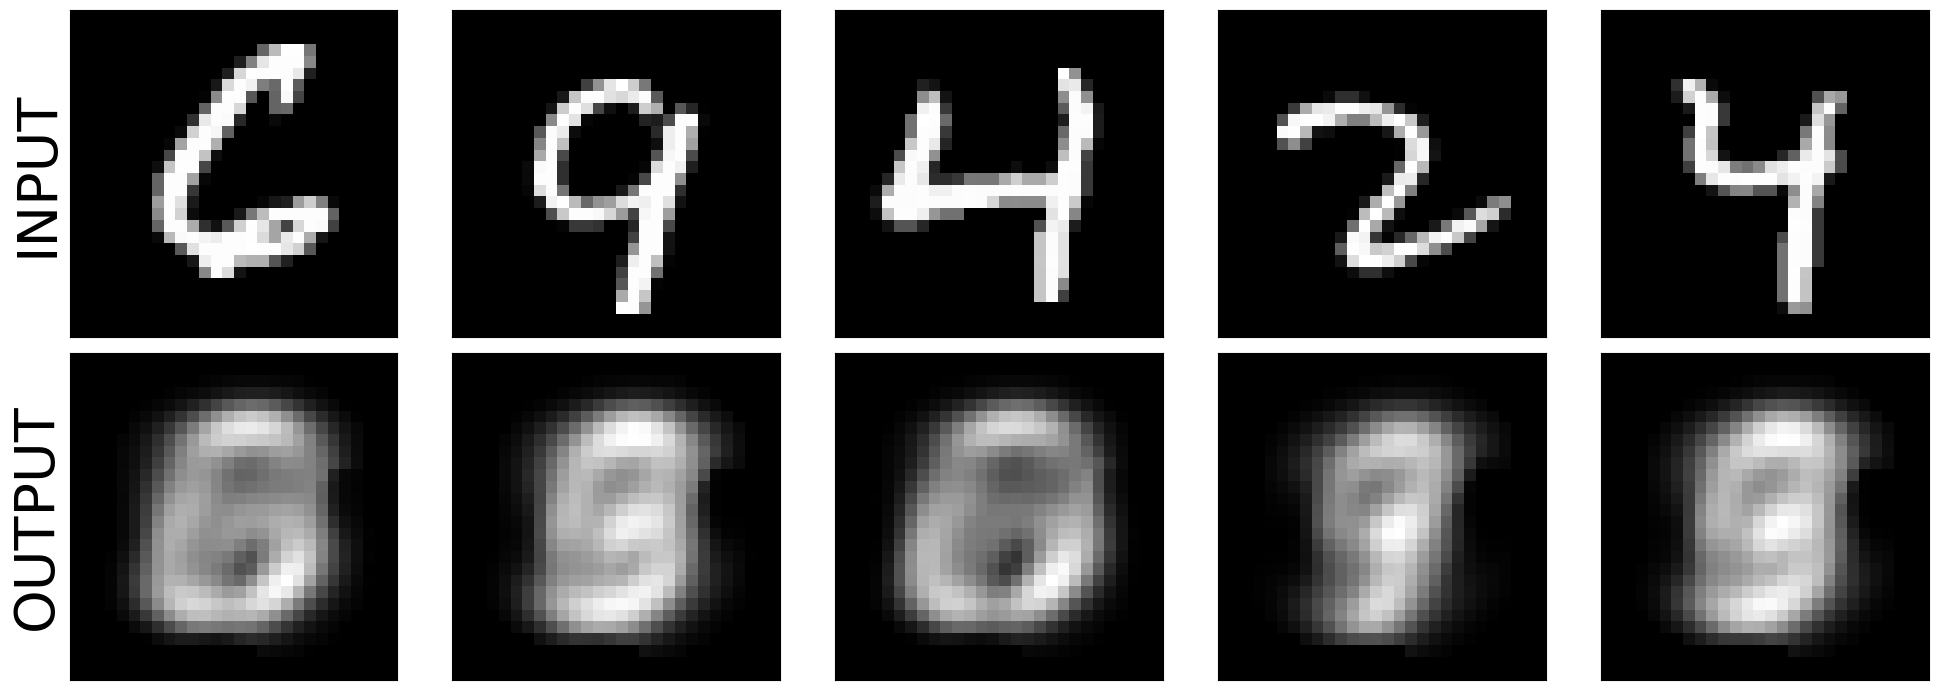

In [ ]:
import random

fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))
# randomly select 5 images
randomly_selected_imgs = random.sample(range(output.shape[0]),5)
# plot original images (input) on top row
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel("INPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# plot output images from our autoencoder on the bottom row
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28),
    cmap='gray')
    if i == 0:
        ax.set_ylabel("OUTPUT",size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

-----

# Effect of hidden layer size on autoenconder performance

In [ ]:
def create_basic_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,),
    activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

Create and trains five differents models with 2,4,8,16 and 32 nodes

In [ ]:
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size=32)

Let's train all five of our models together

In [ ]:
hiddenLayerSize_2_model.compile(optimizer='adam',
                                loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped,
                            X_train_reshaped,
                            epochs=10,
                            verbose=0)

In [ ]:
hiddenLayerSize_4_model.compile(optimizer='adam',
                                loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped,
                            X_train_reshaped,
                            epochs=10,
                            verbose=0)

In [ ]:
hiddenLayerSize_8_model.compile(optimizer='adam',
                                loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped,
                            X_train_reshaped,
                            epochs=10,
                            verbose=0)

In [ ]:
hiddenLayerSize_16_model.compile(optimizer='adam',
                                loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped,
                             X_train_reshaped,
                             epochs=10,
                             verbose=0)

In [ ]:
hiddenLayerSize_32_model.compile(optimizer='adam',
                                 loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped,
                             X_train_reshaped,
                             epochs=10,
                             verbose=0)

Once training is complete, we apply the trained models on the testing set:

In [ ]:
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)

313/313 [==============================] - 1s 1ms/step


Now, let's plot five randomly selected outputs from each model and see how they compare
to the original input image:

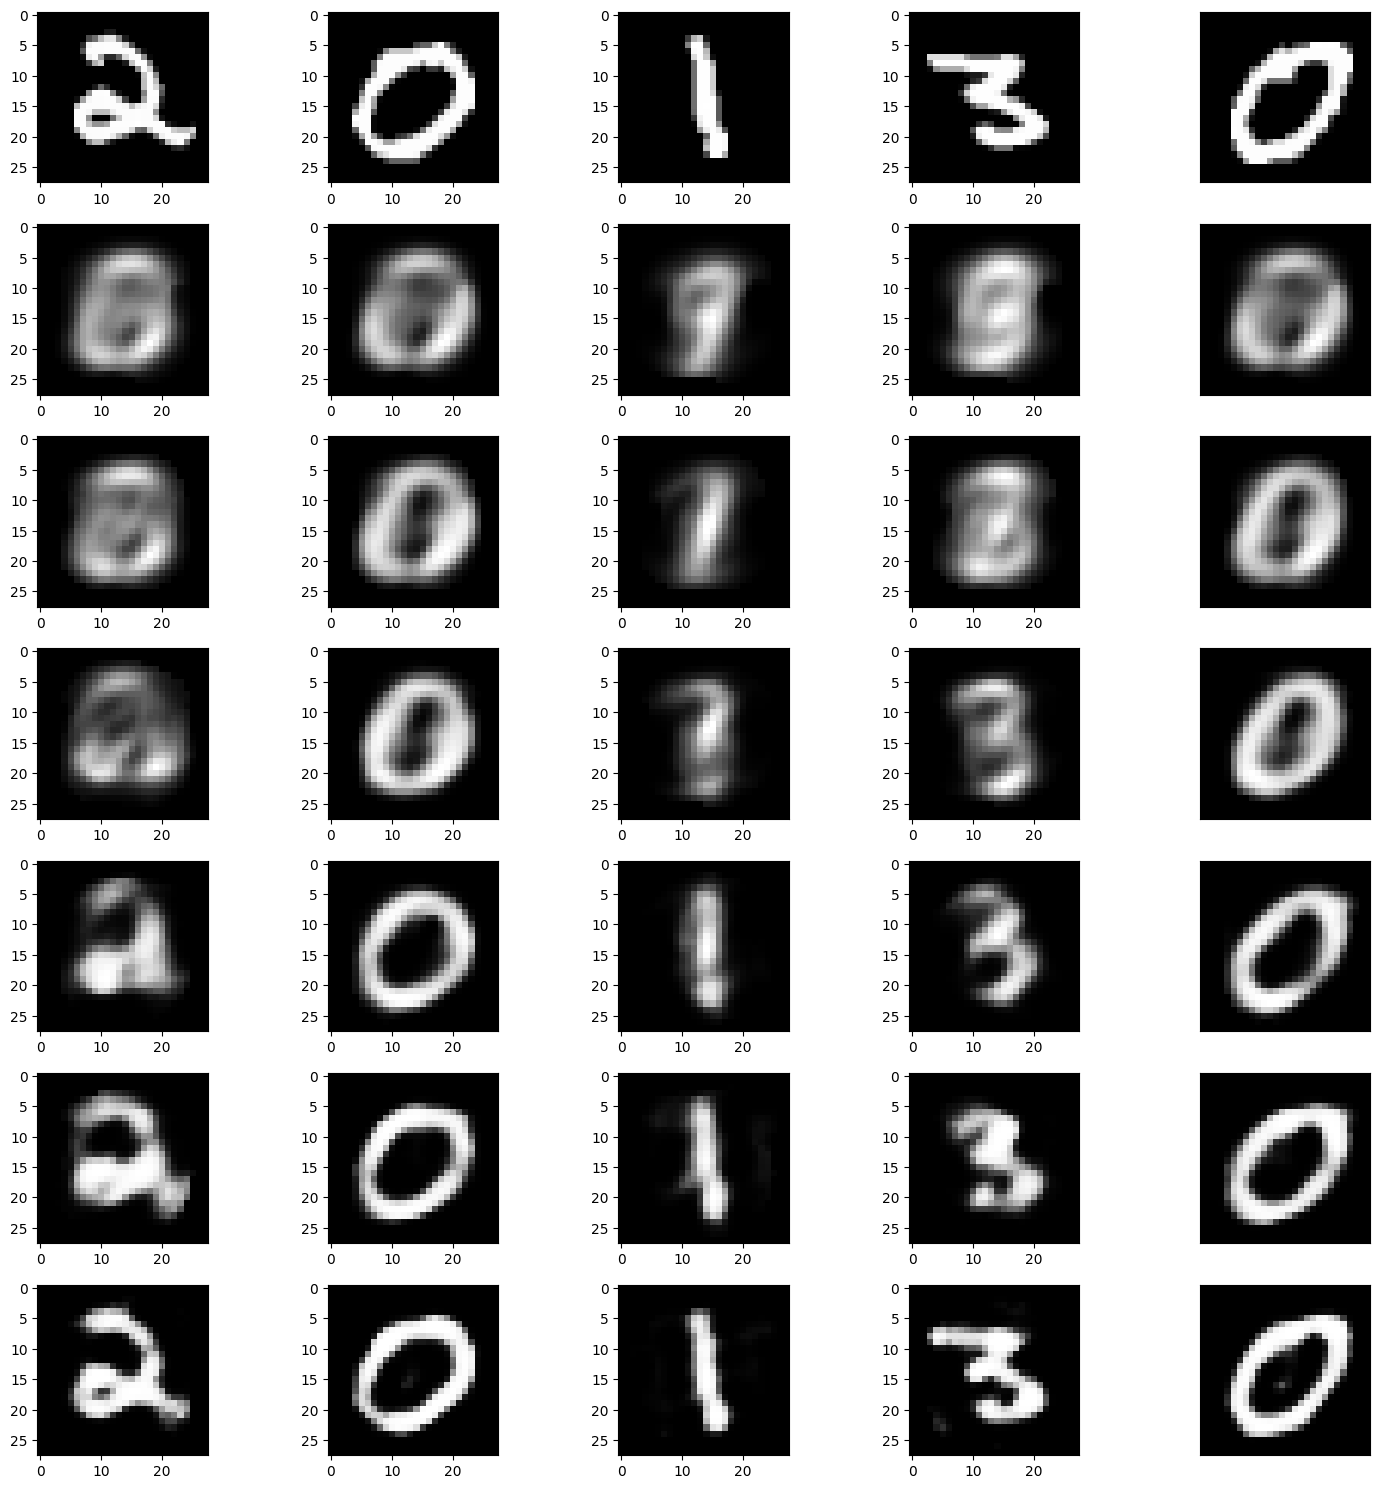

In [ ]:
fig, axes = plt.subplots(7, 5, figsize=(15,15))

randomly_selected_imgs = random.sample(range(output.shape[0]),5)
outputs = [X_test, output, output_2_model, output_4_model, output_8_model,
           output_16_model, output_32_model]
# Iterate through each subplot and plot accordingly
for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28), cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

At 32 nodes in the hidden layer, the output becomes very close (though not perfect) to the original input. Interestingly, we have shrunk the original input by 24.5 times (784÷32) and still managed to produce a satisfactory output. That's a pretty impressive compression
ratio!